[View in Colaboratory](https://colab.research.google.com/github/rahulanandn/ThinkStats2/blob/master/Wine_Quality.ipynb)

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
#print(os.listdir("../input"))

In [0]:
df = pd.read_csv('winequality-red.csv')

In [58]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [60]:
df[df.isnull()].count()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### There is no missing values

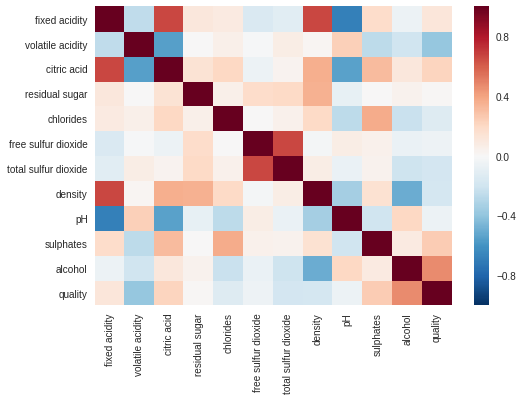

In [61]:
sns.heatmap(df.corr())

### Positively correlated
#### Citric Acid & Fixed Acidic
#### Chlorides & Citric Acid
#### SO2 & Sugar
#### Total & Free SO2
#### Density & Fixed acidic, Citric acid and Sugar
#### Sulphates & Citric acid, Chlorides
#### Quality and Alcohol

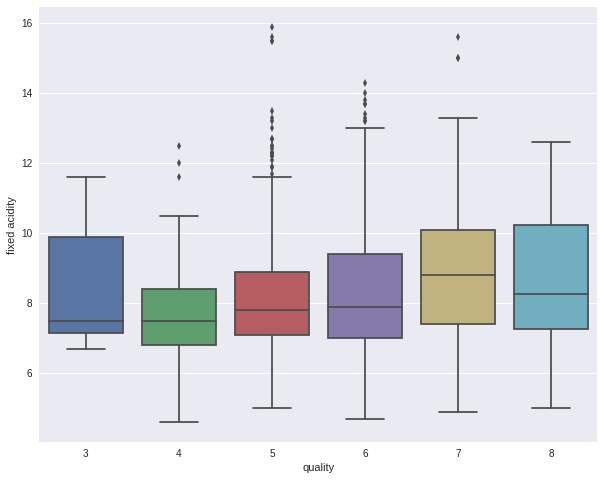

In [62]:
plt.figure(figsize=(10,8))
sns.boxplot(df['quality'],df['fixed acidity'])

### As the fixed acidity increases, quality of the wine has also increased.

## pH VS Fixed Acidity (Non-Volatile)

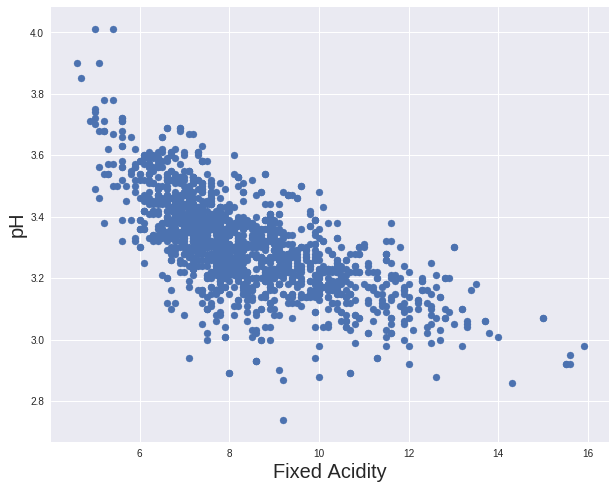

In [63]:
plt.figure(figsize=(10,8))
plt.scatter(df['fixed acidity'],df['pH'])
plt.xlabel('Fixed Acidity').set_size(20)
plt.ylabel('pH').set_size(20)

### Lower the pH higher the Acidity
#### ** Note 
#### 1. (1-7 pH) Acid
####              2. (0pH) Water
####              3. (7-14 pH) Base
### From the note we can infer that the lower pH wines are acidic.  

### Basically wines have a pH range (2.9 - 3.9)

### Relationship between pH & Quality

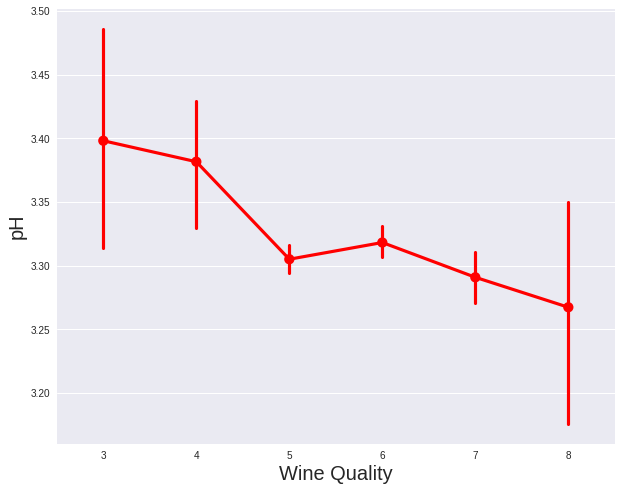

In [64]:
plt.figure(figsize=(10,8))
sns.pointplot(df['quality'],df['pH'], color='red')
plt.xlabel('Wine Quality').set_size(20)
plt.ylabel('pH').set_size(20)

#### Gradually the quality of wine is decreasing as pH level is increased.
### The pointplot shows that, Higher quality wines are more acidic.

### Relationship between Citric Acid & Quality

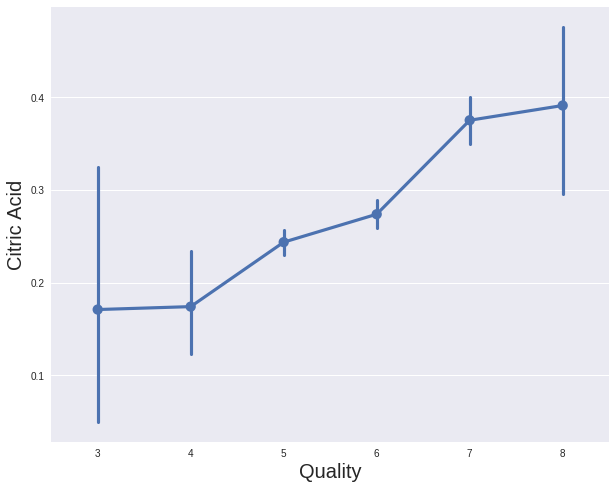

In [65]:
plt.figure(figsize=(10,8))
sns.pointplot(df['quality'],df['citric acid'])
plt.xlabel('Quality').set_size(20)
plt.ylabel('Citric Acid').set_size(20)

#### More the citric acid, increased Quality
####  It is used to acidify the wine that are basic after primary fermentation and another reason for adding after fermentation due to the tendency of yeast to convert citric into acetic acid. Acetic acid spoles the quality of wine by making in volatile

### Relationship between SO2 & Quality

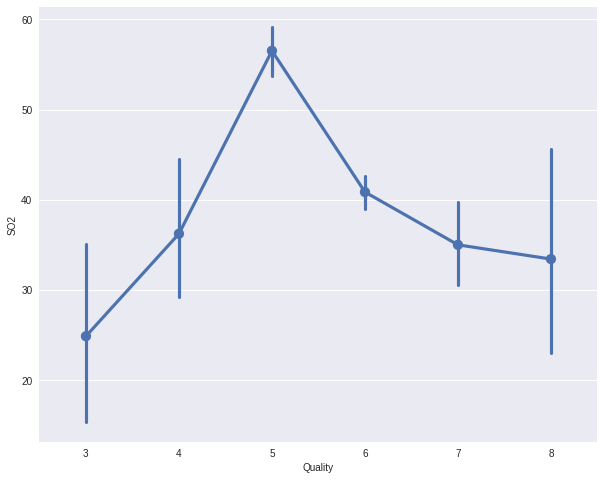

In [66]:
plt.figure(figsize=(10,8))
sns.pointplot(df['quality'],df['total sulfur dioxide'])
plt.xlabel('Quality').set_size(10)
plt.ylabel('SO2').set_size(10)

#### Used to inhibit the microbes oxidation.

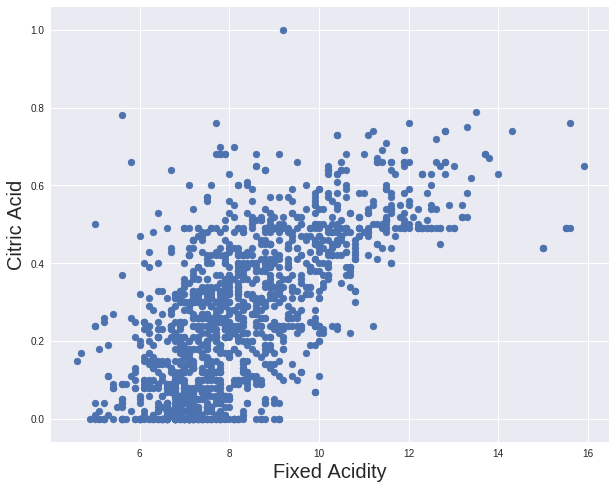

In [67]:
 plt.figure(figsize=(10,8))
plt.scatter(df['fixed acidity'],df['citric acid'])
plt.xlabel('Fixed Acidity').set_size(20)
plt.ylabel('Citric Acid').set_size(20)

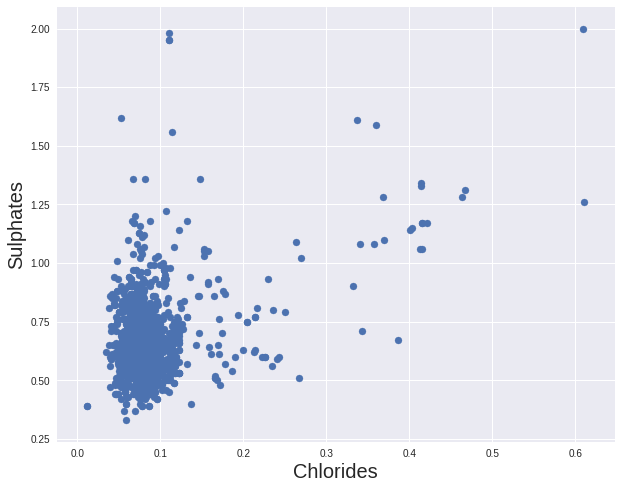

In [68]:
 plt.figure(figsize=(10,8))
plt.scatter(df['chlorides'],df['sulphates'])
plt.xlabel('Chlorides').set_size(20)
plt.ylabel('Sulphates').set_size(20)

#### Though sulphates and Chlorides are positvely correlated but Sulphate content is more in most of the less chloride contained wines

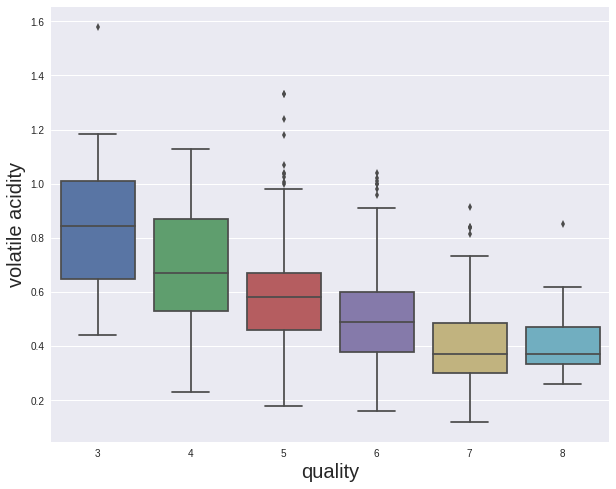

In [69]:
plt.figure(figsize=(10,8))
sns.boxplot(df['quality'],df['volatile acidity'])
plt.xlabel('quality').set_size(20)
plt.ylabel('volatile acidity').set_size(20)

#### Volatile acidity spoils the wine by lowering the quality.

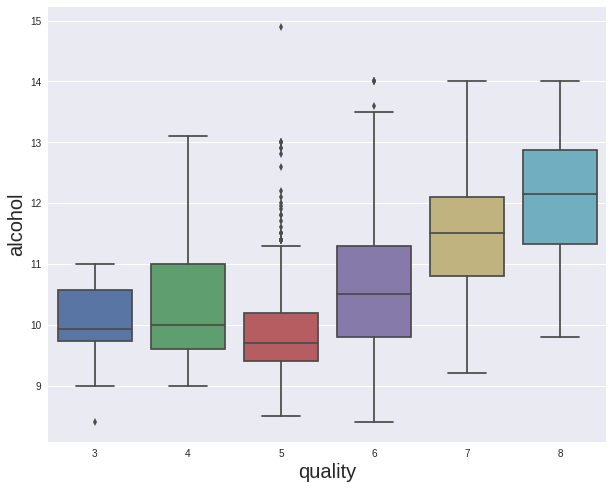

In [70]:
plt.figure(figsize=(10,8))
sns.boxplot(df['quality'],df['alcohol'])
plt.xlabel('quality').set_size(20)
plt.ylabel('alcohol').set_size(20)

#### It is an important content of the wine, which enhances wine's quality quantitavely.

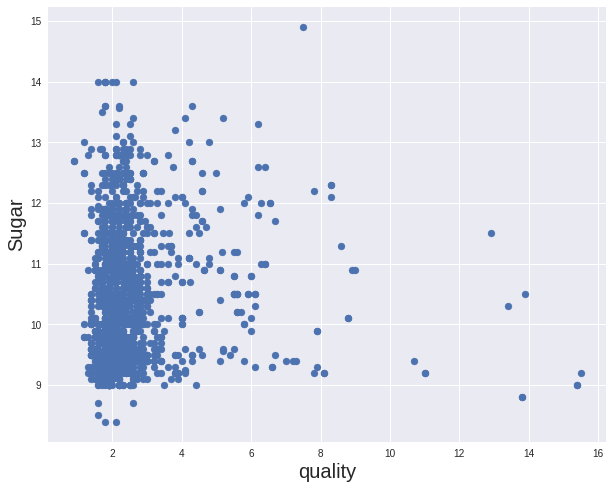

In [71]:
plt.figure(figsize=(10,8))
plt.scatter(df['residual sugar'],df['alcohol'])
plt.xlabel('quality').set_size(20)
plt.ylabel('Sugar').set_size(20)

##  Modeling

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# Sclaing all the features using Standard Scaler 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [0]:
#df1 = df.cle['quality']
df1 = df.drop(['quality'], axis=1)

In [0]:
scale.fit(df1)
scale_fit = scale.transform(df1)

In [76]:
scale_df = pd.DataFrame(scale_fit)
scale_df

,0,1,2,3,4,5,6,7,8,9,10
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
5,-0.528360,0.738418,-1.391472,-0.524166,-0.264960,-0.274931,-0.196679,0.558274,1.288643,-0.579207,-0.960246
6,-0.241094,0.403229,-1.083370,-0.666062,-0.392483,-0.083669,0.381091,-0.183745,-0.072005,-1.169337,-0.960246
7,-0.585813,0.682553,-1.391472,-0.949853,-0.477498,-0.083669,-0.774449,-1.137769,0.511130,-1.110324,-0.397043
8,-0.298547,0.291499,-1.288771,-0.382271,-0.307468,-0.657454,-0.865676,0.028261,0.316751,-0.520193,-0.866379
9,-0.470907,-0.155419,0.457144,2.526589,-0.349975,0.107592,1.688677,0.558274,0.251958,0.837107,0.072294


In [0]:
def qual_enc(quality):
    if quality == 3 or quality == 4:
        return 0
    elif quality == 5 or quality == 6:
        return 1
    else:
        return 2
df['quality_rate'] = df['quality'].apply(qual_enc)

#### Data is ready for Training

In [0]:
X = scale_df
y = df['quality_rate']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

##  Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train) # Training 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
# Prdeiction
log_pred = log.predict(X_test)

In [82]:
# Confusion Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
log_CM = confusion_matrix(y_test, log_pred)
log_CM

array([[  1,  17,   0],
       [  0, 381,   7],
       [  0,  56,  18]])

In [83]:
# Accuracy Score
log_AC = metrics.accuracy_score(y_test, log_pred)
log_AC

0.8333333333333334

### SVM

In [84]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
# Prediction
svm_pred = svm.predict(X_test)

In [86]:
# Confusion Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
svm_CM = confusion_matrix(y_test, svm_pred)
svm_CM

array([[  0,  18,   0],
       [  0, 381,   7],
       [  0,  50,  24]])

In [87]:
# Accuracy Score
svm_AC = metrics.accuracy_score(y_test, svm_pred)
svm_AC

0.84375

## Grid Search CV

In [88]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
#k_range = list(range(1, 31))
#param_grid = dict(n_neighbors=k_range)
param_grid = { 'kernel': ['rbf'],'C': [0.1,1,3,10], 'gamma': [0.001,0.01,0.1,1]}
svc = svm.SVC()
grid = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': [0.1, 1, 3, 10], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [89]:
grid.grid_scores_

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.83199, std: 0.00172, params: {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.001},
 mean: 0.83199, std: 0.00172, params: {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.01},
 mean: 0.83199, std: 0.00172, params: {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.1},
 mean: 0.83199, std: 0.00172, params: {'kernel': 'rbf', 'C': 0.1, 'gamma': 1},
 mean: 0.83199, std: 0.00172, params: {'kernel': 'rbf', 'C': 1, 'gamma': 0.001},
 mean: 0.83199, std: 0.00172, params: {'kernel': 'rbf', 'C': 1, 'gamma': 0.01},
 mean: 0.84450, std: 0.01148, params: {'kernel': 'rbf', 'C': 1, 'gamma': 0.1},
 mean: 0.84987, std: 0.01878, params: {'kernel': 'rbf', 'C': 1, 'gamma': 1},
 mean: 0.83199, std: 0.00172, params: {'kernel': 'rbf', 'C': 3, 'gamma': 0.001},
 mean: 0.83110, std: 0.00157, params: {'kernel': 'rbf', 'C': 3, 'gamma': 0.01},
 mean: 0.84987, std: 0.01524, params: {'kernel': 'rbf', 'C': 3, 'gamma': 0.1},
 mean: 0.85255, std: 0.01635, params: {'kernel': 'rbf', 'C': 3, 'gamma': 1},
 mean: 0.83199, std: 0.00172, params: {'k

In [90]:
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)

{'kernel': 'rbf', 'C': 0.1, 'gamma': 0.001}
[0.83111111 0.83035714 0.83035714 0.83408072 0.83408072]
0.8319928507596068


/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [91]:
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)



[0.8319928507596068, 0.8319928507596068, 0.8319928507596068, 0.8319928507596068, 0.8319928507596068, 0.8319928507596068, 0.8445040214477212, 0.8498659517426274, 0.8319928507596068, 0.8310991957104558, 0.8498659517426274, 0.8525469168900804, 0.8319928507596068, 0.8346738159070599, 0.8489722966934763, 0.8480786416443253]


/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [92]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
#k_range = list(range(1, 31))
#param_grid = dict(n_neighbors=k_range)
param_grid =  [
  {'C': [0.1,1,3,10], 'kernel': ['linear']},
  {'C': [0.1,1,3,10], 'gamma': [0.001,0.01,0.1,1], 'kernel': ['rbf']},]
svc = svm.SVC()
grid = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear'], 'C': [0.1, 1, 3, 10]}, {'kernel': ['rbf'], 'C': [0.1, 1, 3, 10], 'gamma': [0.001, 0.01, 0.1, 1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [93]:
print('Best C:',grid.best_estimator_.C) 
print('Best Kernel:',grid.best_estimator_.kernel)
print('Best Gamma:',grid.best_estimator_.gamma)

('Best C:', 3)
('Best Kernel:', 'rbf')
('Best Gamma:', 1)


In [94]:
# Best Score
print('Best score:', grid.best_score_) 

('Best score:', 0.8525469168900804)
